# Movie Recommendation System

Aim : Show the movies on basis of users preference about movies taste. 
Explain : Suppose a user likes horror movies with some comedy and animation. In that case, we will suggest some movies based on their preferred genres.

In [ ]:
import pandas as pd
import numpy as np

******Data Acquisition Process******

In [2]:
#Here we get the date from the data type file which is like text format, we used some method to readable that data.
data = pd.read_csv(r"E:\DATA-SCIENCE\Project\Movie_Rec\u.data",sep="\t",header=None,
                   names=['User_id','Movie_id','Ratings'],usecols=[0,1,2])

In [3]:
data

,User_id,Movie_id,Ratings
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [4]:
data.shape

(100000, 3)

In [5]:
#these are the movies column name that are inside the u.item file..
cols = "movie id | movie title | release date | video release date | IMDb URL | \
unknown | Action | Adventure | Animation | Children's | Comedy | Crime | \
Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | \
Romance | Sci-Fi | Thriller | War | Western"
cols = cols.split(" | ")
print(cols)

['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [10]:
#Read another file for data
data_item = pd.read_csv(r"E:\DATA-SCIENCE\Project\Movie_Rec\u.item",sep="|",header=None,
                       encoding="latin",names=['movie id','movie title'],usecols=[0,1],index_col='movie id')

In [14]:
#here only we select the movie id and name that will use end of project 
data_item

,movie title
movie id,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)
...,...
1678,Mat' i syn (1997)
1679,B. Monkey (1998)
1680,Sliding Doors (1998)


In [11]:
data_item.columns

Index(['movie title'], dtype='object')

In [12]:
#This file content the main information like all movies name,release data and respective genres.
data_movie = pd.read_csv(r"E:\DATA-SCIENCE\Project\Movie_Rec\u.item",sep="|",header=None,encoding="latin",
                         names=cols,index_col='movie id')

In [13]:
data_movie

,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Data Wrangling**

In [15]:
#here we drop unwanted data and only select the numeric data
data_movie.drop(['movie title','release date','video release date','IMDb URL'],axis=1,inplace=True)

In [16]:
data_movie

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


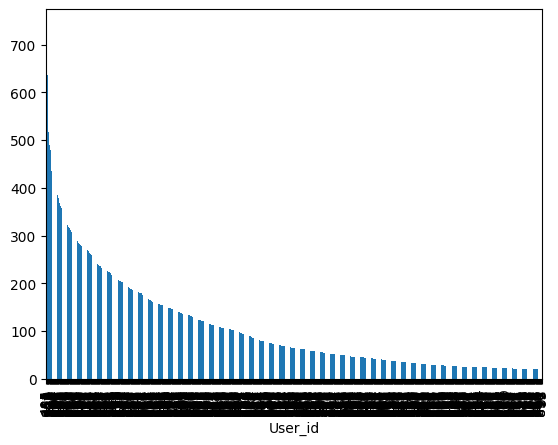

In [17]:
#ploting for see the user id values count [which user gives highest revies on IMDb]
data.User_id.value_counts().plot(kind="bar");

In [18]:
#Let we check movie id average rating by the user id [how many users gives average rating to specific movie] 
movie_rating = data.groupby('Movie_id').agg({'Ratings' : 'mean','User_id' : 'count'})

In [19]:
data.columns

Index(['User_id', 'Movie_id', 'Ratings'], dtype='object')

In [20]:
movie_rating

,Ratings,User_id
Movie_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86
...,...,...
1678,1.000000,1
1679,3.000000,1
1680,2.000000,1


In [32]:
data[data['User_id'] == 452]

,User_id,Movie_id,Ratings
18367,452,25,2
18537,452,523,2
18738,452,1109,2
18838,452,152,2
18968,452,495,4
...,...,...,...
95086,452,223,5
96151,452,210,4
97082,452,213,4
97755,452,98,5


In [21]:
#Replace the movie rating column name:
movie_rating.rename({'Ratings':'Avg Ratings','User_id':'count'},inplace=True,axis=1)

In [22]:
movie_rating

,Avg Ratings,count
Movie_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86
...,...,...
1678,1.000000,1
1679,3.000000,1
1680,2.000000,1


In [23]:
data['User_id'].value_counts()

User_id
405    737
655    685
13     636
450    540
276    518
      ... 
441     20
36      20
812     20
895     20
93      20
Name: count, Length: 943, dtype: int64

In [24]:
movie_rating.iloc[180:182,:]

,Avg Ratings,count
Movie_id,,
181,4.007890,507
182,3.951327,226


In [25]:
#Max movie rating count 
movie_rating['count'].max()

583

In [29]:
#let check which movie has highest avg rating where user gives 583 ratings to that movie:
movie_rating[movie_rating['count'] == 583]  #that movie id is 50 with avg 4.35 ratings

,Avg Ratings,count
Movie_id,,
50,4.358491,583


In [27]:
#here it's about minimum movie review 
movie_rating['count'].min()

1

In [28]:
movie_rating[movie_rating['count'] == 1] #there are so many movies which is rated by only one user

,Avg Ratings,count
Movie_id,,
599,1.0,1
677,3.0,1
711,4.0,1
814,5.0,1
830,1.0,1
...,...,...
1678,1.0,1
1679,3.0,1
1680,2.0,1


# Main part of project

**Popularity : Min max scaling = Xi - min(X) ----------- max(X)-min(X)**

**Xi is each value in columns or features**

In [30]:
#here we find the popularity of each movie with equations:
mi=movie_rating['count'].min()    
mx=movie_rating['count'].max()

In [31]:
#Made new feature populatiry that will count value of each movie popularity
movie_rating['Popularity'] = movie_rating['count'].apply(lambda v : round((v-mi)/(mx-mi),2))   #here (v) is each value 

In [32]:
movie_rating

,Avg Ratings,count,Popularity
Movie_id,,,
1,3.878319,452,0.77
2,3.206107,131,0.22
3,3.033333,90,0.15
4,3.550239,209,0.36
5,3.302326,86,0.15
...,...,...,...
1678,1.000000,1,0.00
1679,3.000000,1,0.00
1680,2.000000,1,0.00


In [58]:
#Drop the count as we have popularity in column
movie_rating.drop('count',axis=1,inplace=True)

In [59]:
movie_rating

,Avg Ratings,Popularity
Movie_id,,
1,3.878319,0.77
2,3.206107,0.22
3,3.033333,0.15
4,3.550239,0.36
5,3.302326,0.15
...,...,...
1678,1.000000,0.00
1679,3.000000,0.00
1680,2.000000,0.00


In [60]:
#As we know movie id 50 has higher movie rating, thats why its has higher popular as per our data
movie_rating.loc[50,]

Avg Ratings    4.358491
Popularity     1.000000
Name: 50, dtype: float64

In [63]:
movie_rating[movie_rating['Popularity'] == 1].index.values[0]

50

In [64]:
data_movie

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [65]:
data_movie.shape

(1682, 19)

**Data Cleaning**

In [67]:
data_movie.isna().sum()

unknown        0
Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64

In [68]:
movie_rating.isna().sum()

Avg Ratings    0
Popularity     0
dtype: int64

In [69]:
#now here we merge two diff dataframe 
X = pd.merge(data_movie,movie_rating,left_index=True,right_index=True)

In [70]:
X

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Avg Ratings,Popularity
movie id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3.878319,0.77
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.206107,0.22
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.033333,0.15
4,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,3.550239,0.36
5,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,3.302326,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.000000,0.00
1679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,3.000000,0.00
1680,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,2.000000,0.00


In [72]:
#drop unknown column
X.drop('unknown',axis=1,inplace=True)

In [73]:
X

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Avg Ratings,Popularity
movie id,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.878319,0.77
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.206107,0.22
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.033333,0.15
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3.550239,0.36
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3.302326,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.000000,0.00
1679,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,3.000000,0.00
1680,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2.000000,0.00


In [74]:
#Top 50 Popular movies
movie_rating.sort_values('Popularity',ascending=False)[:50]

,Avg Ratings,Popularity
Movie_id,,
50,4.358491,1.00
100,4.155512,0.87
181,4.007890,0.87
258,3.803536,0.87
294,3.156701,0.83
286,3.656965,0.82
288,3.441423,0.82
1,3.878319,0.77
300,3.631090,0.74


In [75]:
#now with the cosine and euclidean we find the distance between the values for recommendation

In [76]:
from scipy.spatial.distance import cosine,euclidean

In [77]:
#let we take some examples to understand this concept 

In [79]:
#Example 1 
v1 = np.array([3.2,0.5])
v2 = np.array([3.2,0.5])
print(f'Distance : {euclidean(v1,v2)}') #here 0 distance btwn two arrays

Distance : 0.0


In [80]:
#Example 2
a1 = np.array([0,1,0,1,0,1])
a2 = np.array([1,0,1,0,1,0])
print(f'Distance {euclidean(a1,a2)}, cosine {cosine(a1,a2)}')

Distance 2.449489742783178, cosine 1.0


In [81]:
#Now let check with our data and take process

In [82]:
#first we make the function to find the euclidean distance
def distance(x1,x2):
    return euclidean(x1,x2)

In [91]:
#Now we make another User-define function for movie recommendation
def SimilarMovie(mid,k=10):
    X_new = X.loc[mid].values      #select the values of preference movies
 #   print("X_new",X_new)
    result = []
    for ix,each_movie in zip(X.index,X.values):
        d = distance(X_new,each_movie)
        result.append((d,ix))
    result.sort()
    movie_ids = [ix for d,ix in result[:k]]
    movie_recomm = data_item.loc[movie_ids]
    return movie_recomm

In [92]:
SimilarMovie(50,k=10)

,movie title
movie id,
50,Star Wars (1977)
181,Return of the Jedi (1983)
172,"Empire Strikes Back, The (1980)"
498,"African Queen, The (1951)"
222,Star Trek: First Contact (1996)
228,Star Trek: The Wrath of Khan (1982)
271,Starship Troopers (1997)
82,Jurassic Park (1993)
121,Independence Day (ID4) (1996)


In [94]:
inp = int(input("Enter the movie id we will suggest you another movies:"))
SimilarMovie(inp,k=10)

Enter the movie id we will suggest you another movies:30


,movie title
movie id,
30,Belle de jour (1967)
612,Lost Horizon (1937)
297,Ulee's Gold (1997)
837,Meet John Doe (1941)
863,"Garden of Finzi-Contini, The (Giardino dei Fin..."
499,Cat on a Hot Tin Roof (1958)
915,Primary Colors (1998)
57,Priest (1994)
19,Antonia's Line (1995)
